In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Import Data 
transaction_df=pd.read_csv("C:/Users/218882/Downloads/transaction_data.csv")

In [5]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Check the shape of data 
transaction_df.shape

(264836, 8)

In [9]:
purchase_behaviour_df=pd.read_csv("C:/Users/218882/Downloads/purchase_behaviour.csv")

In [11]:
# Print first few rows
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
purchase_behaviour_df.shape

(72637, 3)

In [15]:
# Check the null values 
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [17]:
purchase_behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [19]:
# Check the Data types 
transaction_df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [21]:
purchase_behaviour_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [23]:
# Rename the 'DATE' column to 'CUSTOMER_ID'
transaction_df.rename(columns={'DATE': 'CUSTOMER_ID'}, inplace=True)

# Inspect the first few rows to confirm the change
transaction_df.head()


,CUSTOMER_ID,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [25]:
# Merge the transaction data with purchase behavior data on 'LYLTY_CARD_NBR'
merged_df = pd.merge(transaction_df,purchase_behaviour_df, on='LYLTY_CARD_NBR', how='left')


In [27]:
# Inspect the first few rows to check the data structure
merged_df.head()

,CUSTOMER_ID,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [29]:
# Calculate total sales per product
product_sales = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Sort by total sales to get the top 3 most profitable products
top_3_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

top_3_products


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [31]:
# Calculate frequency, recency, and total sales per customer
customer_metrics = merged_df.groupby('LYLTY_CARD_NBR').agg(
    frequency=('TXN_ID', 'nunique'),
    recency=('CUSTOMER_ID', 'max'),
    total_spend=('TOT_SALES', 'sum')
).reset_index()

# Sort customers by frequency and total spend to identify the top loyal ones
loyal_customers = customer_metrics.sort_values(by=['frequency', 'total_spend'], ascending=False).head(10)

loyal_customers


,LYLTY_CARD_NBR,frequency,recency,total_spend
42813,162039,18,43637,126.8
60925,230078,17,43636,138.6
3686,13138,17,43644,109.0
25958,94185,16,43610,122.8
47959,179228,16,43644,120.8
45905,172032,16,43638,120.1
31654,116181,16,43643,117.6
28605,105026,16,43633,114.2
56380,213140,16,43646,111.2
28457,104117,16,43642,109.6


In [33]:
# Merge customer metrics with purchase behavior data
loyal_customers_info = pd.merge(loyal_customers, purchase_behaviour_df, on='LYLTY_CARD_NBR', how='left')

# Analyze common characteristics 
lifestage_distribution = loyal_customers_info['LIFESTAGE'].value_counts()
premium_customer_distribution = loyal_customers_info['PREMIUM_CUSTOMER'].value_counts()

# Display the analysis
print("Lifestage Distribution of Loyal Customers:")
print(lifestage_distribution)
print("\nPremium vs Budget Distribution of Loyal Customers:")
print(premium_customer_distribution)

Lifestage Distribution of Loyal Customers:
LIFESTAGE
YOUNG FAMILIES           5
OLDER FAMILIES           3
YOUNG SINGLES/COUPLES    1
OLDER SINGLES/COUPLES    1
Name: count, dtype: int64

Premium vs Budget Distribution of Loyal Customers:
PREMIUM_CUSTOMER
Budget        4
Mainstream    3
Premium       3
Name: count, dtype: int64


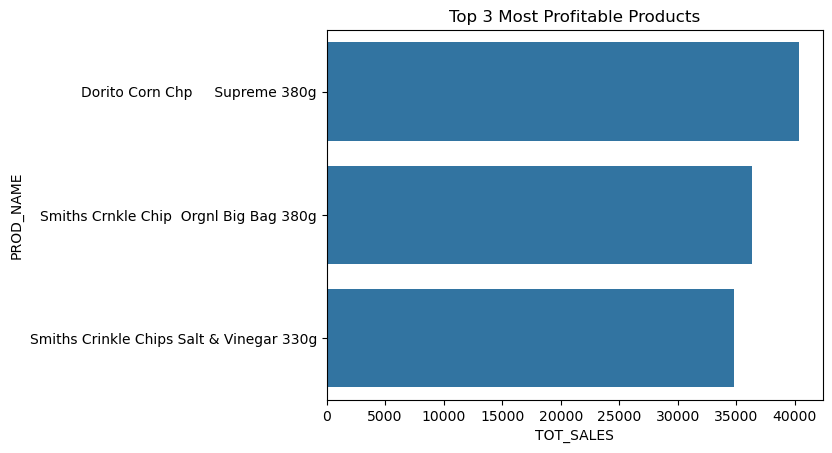

In [35]:
# Visualization 
# Plot the top 3 profitable products
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products)
plt.title('Top 3 Most Profitable Products')
plt.show()

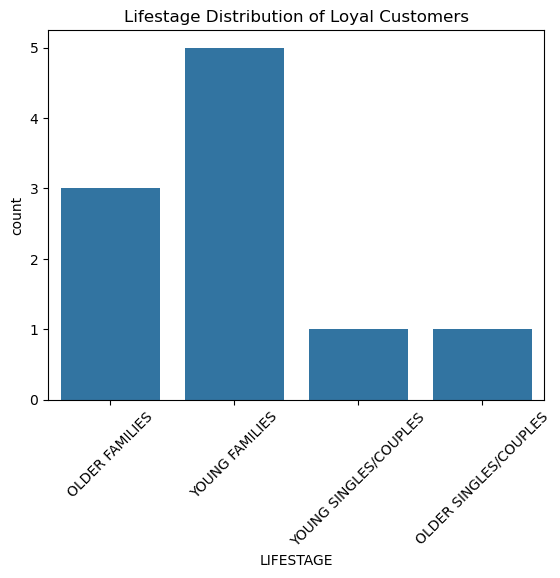

In [37]:
# Plot the distribution of LIFESTAGE for loyal customers
sns.countplot(x='LIFESTAGE', data=loyal_customers_info)
plt.title('Lifestage Distribution of Loyal Customers')
plt.xticks(rotation=45)
plt.show()

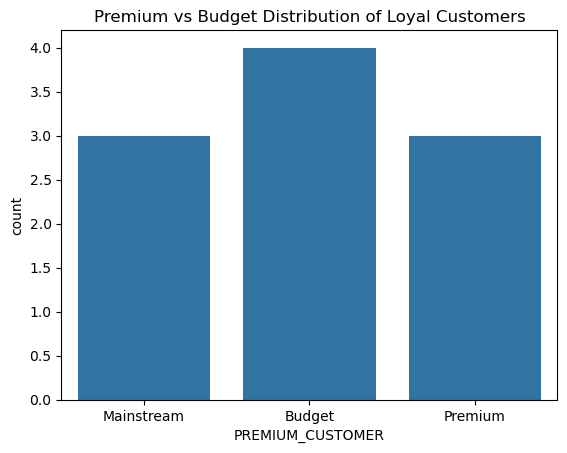

In [39]:
# Plot the distribution of PREMIUM_CUSTOMER for loyal customers
sns.countplot(x='PREMIUM_CUSTOMER', data=loyal_customers_info)
plt.title('Premium vs Budget Distribution of Loyal Customers')
plt.show()


## Hypothesis and Insights:
### 1. Top 3 Most Profitable Products:
    If the top 3 most profitable products are premium products or larger quantities (such as bulk items), we might hypothesize that customers who buy these products tend to have higher disposable income or prefer buying in larger quantities. If these products are mainly associated with premium customers, marketing efforts can target this segment.
   
### 2. Loyal Customer Characteristics:
    Lifestage: If most loyal customers fall under the "Young Singles/Couples" or "Young Families" lifestage, they might prefer products that are convenient, easy-to-prepare, or cater to small households. This can help target product offerings.

    Premium vs Budget: If a significant proportion of loyal customers are Premium, we could focus on premium products and tailor marketing to emphasize quality, exclusivity, or convenience. Alternatively, if most loyal customers are Budget, we might want to promote offers and discounts, highlighting value for money.